Data collected from: 
https://www.kaggle.com/datasets/quora/question-pairs-dataset

# Problem statement:

Quora is a question-answering website where users can ask and answer questions on a variety of topics. However, Quora also has to deal with duplicate questions, which can be a problem for both users and the platform as a whole. Duplicate questions can make it difficult for users to find the answers they are looking for, and they can also lead to users wasting time answering questions that have already been answered.

# Objective:
The objective of Quora duplicate question pair detection is to identify pairs of questions that are essentially asking the same thing. This can be done by using natural language processing techniques to extract features from the questions that can be used to measure their similarity. Once a pair of questions has been identified as duplicate, they can be merged together so that users only see one version of the question.

In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import re

In [74]:
df1 = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\Quora duplicate question pairs\data\questions.csv")
df1.sample(3)

,id,qid1,qid2,question1,question2,is_duplicate
289818,289818,569456,569457,Where can I direct download TV series?,Where can we download TV series for free witho...,0
97946,97946,194395,194396,What are some ways in which hackers get access...,How can one get access to an SS7 network?,1
68295,68295,135763,135764,What are the post study work options in the UK...,What is the current post study work visa optio...,1


In [75]:
df1.shape

(404351, 6)

Dataset is too large to perform the further computations and preprocessing steps. Let's pick a random set of 50000 records and perform our analysis.

In [76]:
df_temp1 = df1[df1['is_duplicate']==1].sample(15000)
df_temp2 = df1[df1['is_duplicate']==0].sample(15000)
df = pd.concat([df_temp1,df_temp2],axis=0)
df.sample(2)

,id,qid1,qid2,question1,question2,is_duplicate
271571,271571,534100,534101,How do study effectively for a long period of ...,What is the best way to concentrate on my stud...,0
263324,263324,518122,518123,Is a monogamous relationship practical and hea...,How much fees will be refunded by kiet group o...,0


In [77]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

[id, qid1,qid2] are irrelevant in predicting the result. Removing the unnecessary columns

In [78]:
df.drop(columns=['id','qid1','qid2'],axis=1, inplace=True)
df.sample(2)

,question1,question2,is_duplicate
21394,Why can't I like comments on Instagram?,Why can’t I ike comments on Instagram?,1
194324,"For an international student, which countries ...",Which countries have free higher education?,1


# Performing text preprocessing

In [79]:
def preprocessing_the_text(q):
    q = q.lower().strip()
    
    # Replacing some of the special charecters with their meaning
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    
    # Expanding the short form of the words
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    expanded_words = []
    for i in q.split():
        if i in contractions:
            j = contractions[i]
            print(j)
        else:
            j = i
        expanded_words.append(j)
    q = " ".join(expanded_words)
    
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    pattern = r'<[^>]+>'
    q = re.sub(pattern, '', q)
    
    # Removing URL's
    
    pattern = r'(https?://|www\.)[^ ]+'
    q = re.sub(pattern, '', q)
    
    # Removing punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q)
    
    return q
        
    

In [80]:
preprocessing_the_text("Hi!, Here is the data set <h2>This text is between the tags</h2> https://www.kaggle.com/datasets/quora/question-pairs-dataset")

'hi   here is the data set this text is between the tags '

In [81]:
# Applying the transformation to the data frame
df['question1'] =  df['question1'].apply(preprocessing_the_text)
df['question2'] =  df['question2'].apply(preprocessing_the_text)

what is
do not
do not
what is
do not
what is
will not
do not
you have
i am
do not
can not
will not
what is
you have
what is
what is
do not
can not
what is
you have
can not
i have
you have
can not
i am
what is
do not
do not
do not
what is
what is
what is
i am
do not
what is
you have
do not
does not
can not
why is
does not
what is
it is
you have
let us
what is
was not
does not
they are
has not
are not
what is
you have
i am
do not
what is
do not
what is
you have
what is
what is
what is
i am
does not
do not
was not
what is
what is
what is
what is
will not
do not
is not
what is
are not
what is
what is
you have
you are
what is
what is
she is
i am
i am
do not
do not
you will
are not
what is
can not
do not
can not
what is
what is
can not
do not
what is
is not
does not
can not
you have
does not
what is
do not
there is
what is
you have
do not
what is
she is
what is
you have
do not
who is
what is
does not
do not
what is
you have
it is
do not
he is
what is
you have
can not
can not
i am
what is
can

what is
i am
i will
what is
did not
i am
you have
do not
who is
i am
you have
you have
do not
what is
what is
i am
i am
does not
it is
do not
do not
he is
did not
what is
do not
it is
you are
i am
what is
how is
i would
i am
is not
does not
you have
do not
what is
what is
i have
what is
what is
do not
do not
do not
what is
does not
do not
i have
do not
could not
do not
do not
did not
could not
do not
i am
i am
do not
what is
do not
what is
i am
what is
you have
does not
you are
is not
it is
i am
they are
what is
you have
what is
do not
does not
what is
would not
i am
is not
would not
i am
does not
can not
are not
what is
i am
can not
do not
it is
were not
what is
can not
i am
i am
you have
he is
i am
what is
it is
should not
you have
what is
can not
do not
it is
did not
i am
can not
i have
have not
what is
do not
you are
what is
does not
i am
do not
they are
did not
do not
should not
what is
should not
do not
he is
what is
what is
you have
will not
could not
how is
can not
were not
i a

they are
do not
do not
do not
who is
can not
you have
what is
do not
can not
does not
i have
she is
does not
i am
do not
can not
does not
does not
what is
can not
is not
i have
did not
does not
you are
that is
he is
do not
i am
do not
does not
what is
what is
who is
i am
do not
what is
do not
are not
did not
what is
who is
it is
should not
do not
do not
it is
do not
what is
is not
i have
what is
i am
does not
can not
do not
what is
they will
can not
do not
how is
what is
i am
i am
what is
there is
do not
is not
do not
can not
i am
do not
did not
i am
does not
i would
do not
i am
i am
i am
i am
i am
do not
i am
what is
can not
do not
does not
does not
can not
do not
what is
i am
does not
what is
did not
what is
do not
i am
i am
what is
does not
can not
will not
we will
i have
i have
he is
that is
do not
what is
do not
is not
what is
do not
what is
does not
does not
does not
do not
does not
will not
i am
what is
i am
what is
will not
do not
i have
do not
do not
can not
what is
it is
what

In [82]:
df.sample(3)

,question1,question2,is_duplicate
272010,cool free things to do in singapore in 12 hours,what are some cool things to do in singapore,0
131397,how is your studies going is this questi...,how is your days going is the quoted part g...,0
189339,is it possible that baltic sea anomaly and the...,does the black knight satellite actually exist,0


 Instead of using only the questions, Lets try to extract some more additional features in order to classify better.
 1. len_q1 = length of the question1
 2. len_q2 = length of the question2
 

In [83]:
len_q1 = df['question1'].apply(lambda x: len(x))
len_q2 = df['question2'].apply(lambda x: len(x))
df['len_q1'] = len_q1
df['len_q2'] = len_q2
df.sample(2)

,question1,question2,is_duplicate,len_q1,len_q2
32418,what does the watch symbolize in edgar allan p...,what is the mood in edgar allan poe s the tel...,0,71,60
229080,how does drop shipping work,what is drop shipping and how does it work,1,28,43


3. words_q1 = # words in question1
4. words_q2 = # words in question2

In [84]:
words_q1 = df['question1'].apply(lambda x: len(x.split(" ")))
words_q2 = df['question2'].apply(lambda x: len(x.split(" ")))
df['words_q1'] = words_q1
df['words_q2'] = words_q2
df.sample(2)

,question1,question2,is_duplicate,len_q1,len_q2,words_q1,words_q2
6204,is it all right for a 25 year old man to date ...,is it wrong for me a 45 year old man to like ...,0,66,66,18,19
113467,what was on imdb s top 250 in 2012,what was on imdb s top 250 in 2014,0,35,35,10,10


5. words_common = # common words in both question1 and question2
6. words_share_q1 = words_common / words_q1
7. words_share_q2 = words_common / words_q2

In [85]:
def common_words(row):

    q1 = row['question1']
    q2 = row['question2']
    q1_words = set(q1.split(" "))
    q2_words = set(q2.split(" "))
    common_words = q1_words.intersection(q2_words)
    return len(common_words)
    

In [86]:
df['common_words'] = df.apply(common_words, axis=1)
df['words_share_q1'] = round(df['common_words']*100/df['words_q1'],2)
df['words_share_q2'] = round(df['common_words']*100/df['words_q2'],2)
df.sample(3)

,question1,question2,is_duplicate,len_q1,len_q2,words_q1,words_q2,common_words,words_share_q1,words_share_q2
186837,what is the difference between sql server and ...,what is the difference between sql server and ...,0,55,52,11,11,9,81.82,81.82
379032,why do not british people ever drink coffee,why do people love iced coffee and iced tea b...,0,44,78,9,18,6,66.67,33.33
136936,how long does marijuana stay in your urine ho...,how long does weed stay in your blood,1,68,38,17,9,7,41.18,77.78


8.  first_word_eq : whether the starting words of the 2 questions are same or not
9.  last_word_eq : whether the ending words of the 2 questions are same or not
10. len_diff : abs(words_q1 - words_q2)


In [87]:
def first_word_eq(row):

    q1 = row['question1']
    q2 = row['question2']
    q1_word1 = q1.split(" ")[0]
    q2_word1 = q2.split(" ")[0]
    return int(q1_word1 == q2_word1)

def last_word_eq(row):

    q1 = row['question1']
    q2 = row['question2']
    q1_word_last = q1.split(" ")[-1]
    q2_word_last = q2.split(" ")[-1]
    return int(q1_word_last == q2_word_last)

df['first_word_eq'] = df.apply(first_word_eq,axis=1)
df['last_word_eq'] = df.apply(last_word_eq,axis=1)
df['len_diff'] = abs(df['words_q1'] - df['words_q2'])

df.sample(3)

,question1,question2,is_duplicate,len_q1,len_q2,words_q1,words_q2,common_words,words_share_q1,words_share_q2,first_word_eq,last_word_eq,len_diff
153027,what are the strongest majors in terms of job ...,what are the strongest majors in terms of job ...,0,108,110,20,20,15,75.00,75.00,1,1,0
217135,what is best way to increase presence of mind,how can we increase ability of brain what sho...,1,46,93,10,19,7,70.00,36.84,0,1,9
102916,do you think clash of clans big boost sale is ...,what are some tips for my admissions interview...,0,88,82,18,14,1,5.56,7.14,0,1,4


11. non_sopwords_common = # non stop words common between qyestion1 and question2
12. stopwords_commom = # stopwords common between question1 and question2

In [88]:
import nltk
from nltk.corpus import stopwords

In [89]:
def non_stopwords_common(row):
    q1 = row['question1'].split(" ")
    q2 = row['question2'].split(" ")
    q1_non_stop_words = []
    q2_non_stop_words = []
    stop_words= stopwords.words('english')
    for i in q1:
        if i not in stop_words:
            q1_non_stop_words.append(i)
    for i in q2:
        if i not in stop_words:
            q2_non_stop_words.append(i)
    q1_set = set(q1_non_stop_words)
    q2_set = set(q2_non_stop_words)
    common = q1_set.intersection(q2_non_stop_words)
    return len(common)


df['non_sopwords_common'] = df.apply(non_stopwords_common,axis=1)
df['stopwords_commom'] = df['common_words'] - df['non_sopwords_common']
df.sample(3)

    

,question1,question2,is_duplicate,len_q1,len_q2,words_q1,words_q2,common_words,words_share_q1,words_share_q2,first_word_eq,last_word_eq,len_diff,non_sopwords_common,stopwords_commom
47481,what do i do if i want to kill myself but do n...,i am 40 i hate my life i want to end my mise...,0,66,89,17,27,8,47.06,29.63,0,1,10,3,5
277582,what are some examples of light refraction in ...,refraction of light is an example of which pro...,0,57,63,11,12,4,36.36,33.33,0,1,1,3,1
85328,what is the interview like at lcbo,what happens after an onsite interview at face...,0,35,51,8,9,4,50.00,44.44,1,1,1,2,2


Extracting the fuzzy features with the help of fuzzt wuzzy library.
Fuzzy string matching is the technique of finding strings that match a pattern approximately (rather than exactly). In other words, fuzzy string matching is a type of search that will find matches even when users misspell words or enter only partial words for the search.

In Python, there are a number of libraries that can be used for fuzzy string matching. One of the most popular libraries is FuzzyWuzzy. FuzzyWuzzy provides a number of functions for fuzzy string matching, including:

* `ratio()`: This function returns a float value between 0 and 1 that represents the similarity between two strings. A value of 1 indicates that the strings are identical, while a value of 0 indicates that the strings are completely different.
* `partial_ratio()`: This function is similar to ratio(), but it only considers the common prefixes and suffixes of the two strings.
* `token_sort_ratio()`: This function returns a float value between 0 and 1 that represents the similarity between two strings after they have been tokenized and sorted.
* `token_set_ratio()`: This function is similar to token_sort_ratio(), but it only considers the common tokens between the two strings.

In [90]:
# ! pip install fuzzywuzzy

In [91]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [92]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

17. `avg_words_length` = (# words_q1 + # Words_q2)/2

In [93]:
df['avg_words_length'] = (df['words_q1']+df['words_q2'])/2

In [94]:
df.sample(3)

,question1,question2,is_duplicate,len_q1,len_q2,words_q1,words_q2,common_words,words_share_q1,words_share_q2,first_word_eq,last_word_eq,len_diff,non_sopwords_common,stopwords_commom,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,avg_words_length
96909,how do i live in the present and enjoy the mom...,what is the easiest way to live in present mom...,1,50,67,12,14,6,50.0,42.86,0,1,2,4,2,45,54,59,73,13.0
306351,how do i start my toefl preparation,how do i prepare for toefl exam,1,36,32,8,8,5,62.5,62.50,1,1,0,2,3,64,66,64,70,8.0
117046,what are good stocks to invest in right now,what are some good stocks to invest in right now,1,44,49,10,11,10,100.0,90.91,1,1,1,5,5,95,89,95,100,10.5


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

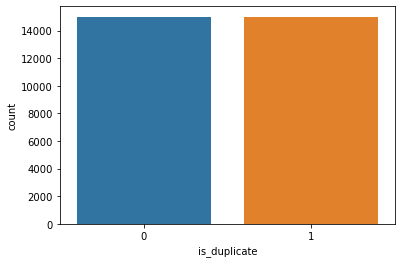

In [95]:
# Performing EDA in order to a the importance of our newly created features
sb.countplot(data=df,x='is_duplicate')

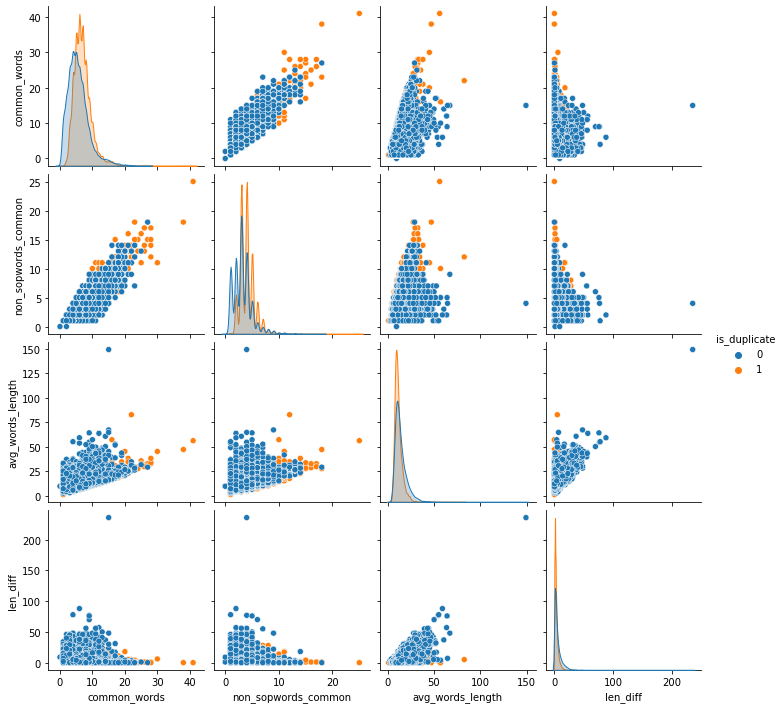

In [96]:
sb.pairplot(df[['common_words','non_sopwords_common','avg_words_length','len_diff', 'is_duplicate']],hue='is_duplicate')
plt.show()

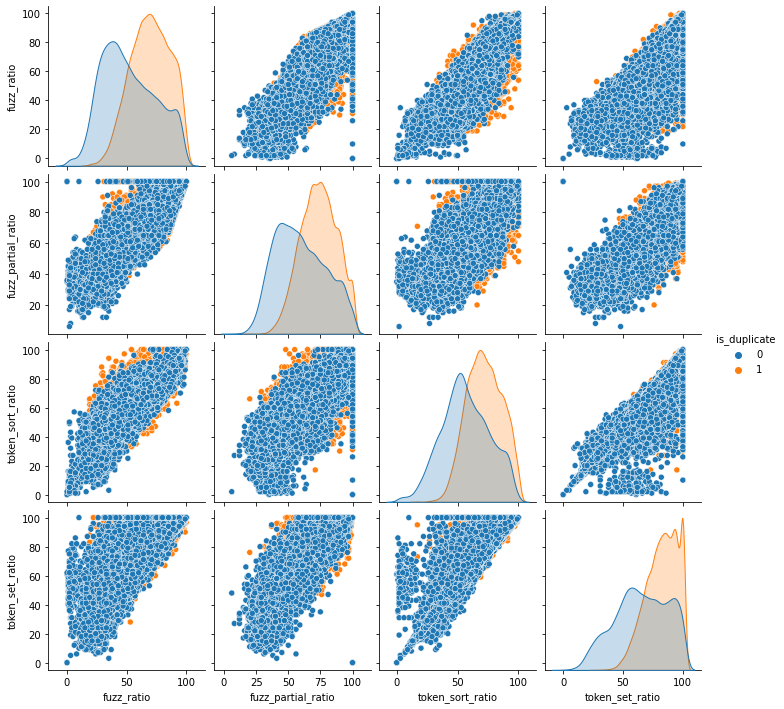

In [97]:
sb.pairplot(df[['fuzz_ratio','fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

Some patterns can be noticed based on the above plots. Let's try to build our model based on these features.

### Converting words into vectors 

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [99]:
questions_df = df[['question1','question2']]

In [100]:
questions = list(questions_df['question1']) + list(questions_df['question2'])
cv = CountVectorizer(max_features=3500)
#cv= TfidfVectorizer(max_features=3500)
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(),2)

temp_df1 = pd.DataFrame(q1_array,index=questions_df.index)
temp_df2 = pd.DataFrame(q2_array,index=questions_df.index)

temp_df = pd.concat([temp_df1,temp_df2],axis=1)


In [101]:
temp_df.shape

(30000, 7000)

In [102]:
final_df = df.drop(['question1','question2'],axis=1)
final_df = pd.concat([final_df,temp_df],axis=1)
final_df.shape

(30000, 7018)

In [103]:
final_df.sample(3)

,is_duplicate,len_q1,len_q2,words_q1,words_q2,common_words,words_share_q1,words_share_q2,first_word_eq,last_word_eq,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
89645,1,23,41,6,8,3,50.00,37.5,1,1,...,1,0,0,0,0,0,0,0,0,0
9858,1,32,35,8,8,5,62.50,62.5,1,1,...,0,0,0,0,0,0,0,0,0,0
99584,1,93,54,18,10,6,33.33,60.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Creating train and test splits
from sklearn.model_selection import train_test_split

In [105]:
X = final_df.drop('is_duplicate',axis=1)
y =df['is_duplicate']
X.columns = [i for i in range(0,7017)]
X.columns = X.columns.astype(str)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23, test_size=0.2)

In [106]:
# Implementing our models
from sklearn.ensemble import RandomForestClassifier


# Random Forest

In [107]:
RF = RandomForestClassifier(n_estimators=200,random_state=25,criterion='gini',max_features='auto', )

In [108]:
RF.fit(X_train,y_train)

C:\Users\prasa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=200, random_state=25)

In [109]:
y_predict = RF.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict))

0.784


In [111]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3000
           1       0.74      0.88      0.80      3000

    accuracy                           0.78      6000
   macro avg       0.80      0.78      0.78      6000
weighted avg       0.80      0.78      0.78      6000



In [112]:
print(confusion_matrix(y_test,y_predict))

[[2062  938]
 [ 358 2642]]


# XGBoost


In [113]:
from xgboost import XGBClassifier

In [114]:
xgb =XGBClassifier()

In [115]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
y_predict = xgb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.7796666666666666
[[2087  913]
 [ 409 2591]]


An accuracy of 78.4 % is achived with the Random Forest classification model. Let's fix the model and proceed for web development.

# Deployment task

In [157]:
df.columns

Index(['question1', 'question2', 'is_duplicate', 'len_q1', 'len_q2',
       'words_q1', 'words_q2', 'common_words', 'words_share_q1',
       'words_share_q2', 'first_word_eq', 'last_word_eq', 'len_diff',
       'non_sopwords_common', 'stopwords_commom', 'fuzz_ratio',
       'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio',
       'avg_words_length'],
      dtype='object')

In [225]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocessing_the_text(q1)
    q2 = preprocessing_the_text(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    
    def common_words(q1,q2):

        q1_words = set(q1.split(" "))
        q2_words = set(q2.split(" "))
        common_words = q1_words.intersection(q2_words)
        return len(common_words)
    
    input_query.append(common_words(q1,q2))
    input_query.append(common_words(q1,q2)*100/len(q1.split(" ")))
    input_query.append(common_words(q1,q2)*100/len(q2.split(" ")))
    
    # first_word_eq, Last_word_eq, len_diff
    
    def first_word_eq(q1,q2):
        q1_word1 = q1.split(" ")[0]
        q2_word1 = q2.split(" ")[0]
        return int(q1_word1 == q2_word1)

    def last_word_eq(q1,q2):
        q1_word_last = q1.split(" ")[-1]
        q2_word_last = q2.split(" ")[-1]
        return int(q1_word_last == q2_word_last)

    first_word_eq = first_word_eq(q1,q2)
    input_query.append(first_word_eq)
    last_word_eq = last_word_eq(q1,q2)
    input_query.append(last_word_eq)
    len_diff = abs(len(q1.split(" ")) - len(q2.split(" ")))
    input_query.append(len_diff)

    
    # non_sopwords_common, stopwords_commom
    def non_stopwords_common(q1,q2):
        q1 =q1.split(" ")
        q2 = q2.split(" ")
        q1_non_stop_words = []
        q2_non_stop_words = []
        stop_words= stopwords.words('english')
        for i in q1:
            if i not in stop_words:
                q1_non_stop_words.append(i)
        for i in q2:
            if i not in stop_words:
                q2_non_stop_words.append(i)
        q1_set = set(q1_non_stop_words)
        q2_set = set(q2_non_stop_words)
        common = q1_set.intersection(q2_non_stop_words)
        return len(common)


    non_sopwords_common = non_stopwords_common(q1,q2)
    input_query.append(non_sopwords_common)
    stopwords_commom = common_words(q1,q2) - non_sopwords_common
    input_query.append(stopwords_commom)
    
    # fuzz_features
    
    def test_fetch_fuzzy_features(q1,q2):
    
        fuzzy_features = [0.0]*4
    
        # fuzz_ratio
        fuzzy_features[0] = fuzz.QRatio(q1, q2)

        # fuzz_partial_ratio
        fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

        # token_sort_ratio
        fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

        # token_set_ratio
        fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

        return fuzzy_features
    
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # avg_words_length
    input_query.append((len(q1.split(" "))+len(q1.split(" ")))/2)
    
  
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,17),q1_bow,q2_bow))


In [227]:
q1 = "What is the capital of Andhra Pradesh?"
q2 = "Where is the capital of Andhra Pradesh?"

In [228]:
RF.predict(query_point_creator(q1, q2))

C:\Users\prasa\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [231]:
import pickle
pickle.dump(RF,open('model.pkl','wb'))
pickle.dump(cv, open('vectorizer.pkl','wb'))

In [239]:
stop_words = stopwords.words('english')

In [241]:
pickle.dump(stop_words, open('stop_words.pkl','wb'))

In [242]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\prasa\appdata\roaming\python\python39\site-packages
Requires: scipy, threadpoolctl, joblib, numpy
Required-by: pmdarima, mlxtend, lightgbm, imbalanced-learn, dtale, scikit-learn-intelex


In [243]:
! pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\prasa\\AppData\\Roaming\\Python\\Python39\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Check the permissions.



  Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl (9.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
